In [1]:
import numpy as np
from scipy.integrate import trapz
import matplotlib.pyplot as plt
from ckine.model import runIL2simple

### Initial assumptions

In [2]:
def dRespon(input, CD25=1.0):
    """ Calculate an IL2 dose response curve. """
    ILs = np.logspace(-3.0, 3.0)
    activee = np.array([runIL2simple(input, ii, CD25) for ii in ILs])
        
    return ILs, activee

def IC50(x, y):
    """ Calculate half-maximal concentration. """
    return np.interp(np.max(y) / 2.0, y, x)

def IC50global(x, y):
    """ Calculate half-maximal concentration w.r.t. wt. """
    return np.interp(20.0, y, x)

changesA = np.logspace(-2, 2, num=30)
changesB = np.array([1.0, 2.0, 5.0, 10.0, 30.0, 100.0])
output = np.zeros((changesA.size, changesB.size))

for i, itemA in enumerate(changesA):
    for j, itemB in enumerate(changesB):
        ILs, BB = dRespon([itemA, itemB])
        output[i, j] = IC50global(ILs, BB)

### Exchanging IL2Rb for IL2Ra affinity in CD25+ cells

A reminder this is using our inferred receptor expression levels from working with the CD25+ YT-1 cells.

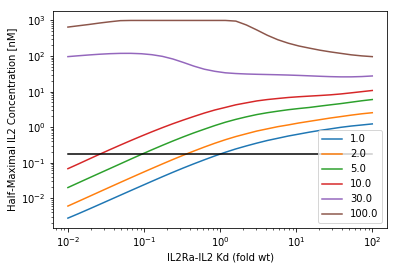

In [3]:
for ii in range(output.shape[1]):
    plt.loglog(changesA, output[:, ii], label=str(changesB[ii]));

plt.loglog([0.01, 100.], [0.17, 0.17], 'k-')
plt.ylabel('Half-Maximal IL2 Concentration [nM]');
plt.xlabel('IL2Ra-IL2 Kd (fold wt)');
plt.legend();

### One case, and ligand consumption

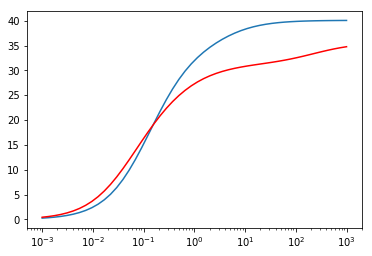

In [4]:
wt = dRespon([1.0, 1.0])
ten = dRespon([0.1, 5.0])

plt.semilogx(wt[0], wt[1], label="wt");
plt.semilogx(ten[0], ten[1], 'r', label="10X higher/lower affinity IL2Ra/IL2Rb");

### IL2Rb affinity adjustment with variable CD25 expression

In [5]:
changesA = np.logspace(-1, 1.5, num=30)
changesB = np.array([0.0, 0.1, 0.25, 0.5, 1.0])
output = np.zeros((changesA.size, changesB.size))

for i, itemA in enumerate(changesA):
    for j, itemB in enumerate(changesB):
        ILs, BB = dRespon([1.0, itemA], CD25=itemB)
        output[i, j] = IC50global(ILs, BB)

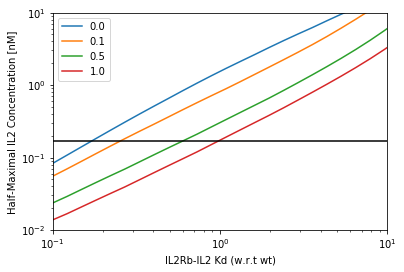

In [6]:
for ii in range(output.shape[1]):
    plt.loglog(changesA, output[:, ii], label=str(changesB[ii]));

plt.loglog([0.1, 10.], [0.17, 0.17], 'k-')
plt.ylabel('Half-Maximal IL2 Concentration [nM]');
plt.xlabel('IL2Rb-IL2 Kd (w.r.t wt)');
plt.ylim((0.01, 10))
plt.xlim((0.1, 10))
plt.legend();

### Same plot, with 10X higher IL2Ra affinity

In [7]:
changesA = np.logspace(-1, 1.5, num=30)
changesB = np.array([0.0, 0.1, 0.5, 1.0])
output = np.zeros((changesA.size, changesB.size))

for i, itemA in enumerate(changesA):
    for j, itemB in enumerate(changesB):
        ILs, BB = dRespon([0.1, itemA], CD25=itemB)
        output[i, j] = IC50global(ILs, BB)

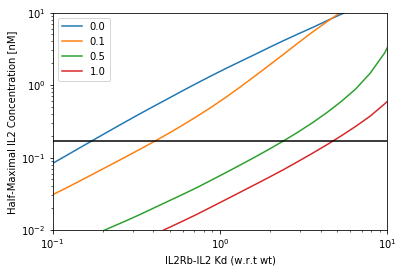

In [8]:
for ii in range(output.shape[1]):
    plt.loglog(changesA, output[:, ii], label=str(changesB[ii]));

plt.loglog([0.1, 10.], [0.17, 0.17], 'k-')
plt.ylabel('Half-Maximal IL2 Concentration [nM]');
plt.xlabel('IL2Rb-IL2 Kd (w.r.t wt)');
plt.ylim((0.01, 10))
plt.xlim((0.1, 10))
plt.legend();